In [1]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append(os.path.abspath(".."))

### Loading the dataset

In [2]:
df = pd.read_csv("../datasets/perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

print("Train set:", X_train.shape, y_train.shape)

Train set: (20, 2) (20,)


In [4]:
print("Training labels:")
counts = Counter(y_train)
for key, value in counts.items():
    print(f"{key}: {value}")

Training labels:
0: 10
1: 10


### Visualize the dataset

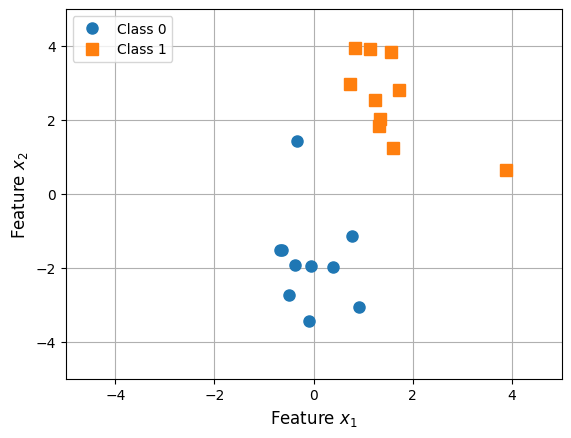

In [5]:
from modules.plotting_helper import plot_feature2d
plot_feature2d(X_train, y_train, markersize=8)

### Design the Model
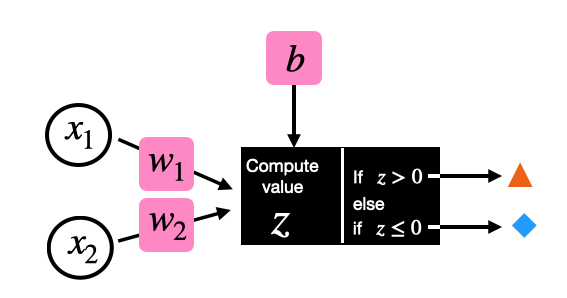

In [6]:
class Perceptron():
    def __init__(self, input_dim):      
        self.weights = np.zeros(input_dim)
        self.bias = np.zeros(1)
        
    def activation(self, z):
        return (z > 0).astype(np.int64)
    
    def forward(self, x):
        z = np.matmul(x, self.weights) + self.bias
        return self.activation(z)
    
    def __call__(self, x):
        return self.forward(x)
    
    def predict(self, x):
        return self(x)
    
    @classmethod
    def accuracy(cls, y_true, y_pred):
        return np.sum(y_pred == y_true) / len(y_true)
    
def loss_fn(y_pred, y_true):
    return y_true - y_pred
    
model = Perceptron(input_dim=2)

### Train the Model

In [7]:
def train(model, num_epochs, lr):
    history = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in zip(X_train, y_train):
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            model.bias += lr * loss
            model.weights += lr * loss * x_batch
            
            epoch_loss += abs(loss.item())
            history.append((loss.item(), model.bias.item(), model.weights.tolist()))
        
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} | epoch_loss: {epoch_loss:.2f}')
    return history

history = train(model, num_epochs=5, lr=0.01)

Epoch: 001/005 | epoch_loss: 1.00
Epoch: 002/005 | epoch_loss: 3.00
Epoch: 003/005 | epoch_loss: 1.00
Epoch: 004/005 | epoch_loss: 0.00
Epoch: 005/005 | epoch_loss: 0.00


In [8]:
bias = model.bias
weights = model.weights
print("Bias:", bias)
print("Weights:", weights)

Bias: [-0.03]
Weights: [0.0286 0.0198]


### Evaluate the Model

In [9]:
y_preds = model.predict(X_train)

train_acc = model.accuracy(y_train, y_preds)
print(f"Train Accuracy: {train_acc:.2f}")

Train Accuracy: 1.00


### Vizualize the Results

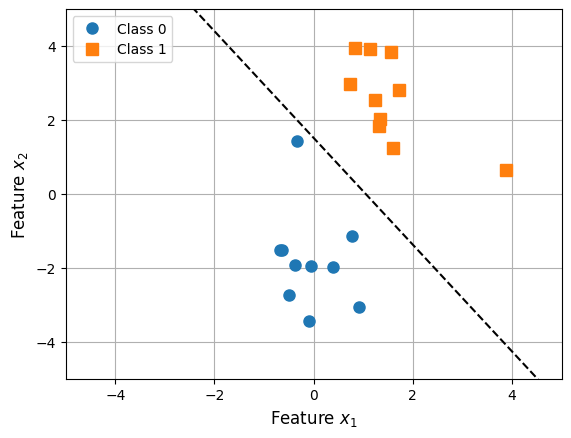

In [10]:
plot_feature2d(X_train, y_train, bias, weights, markersize=8)

### Vizualize Training Batches

batch_idx: 10, loss: 1, bias: 0.01, weights: ['0.0388', '0.0065']


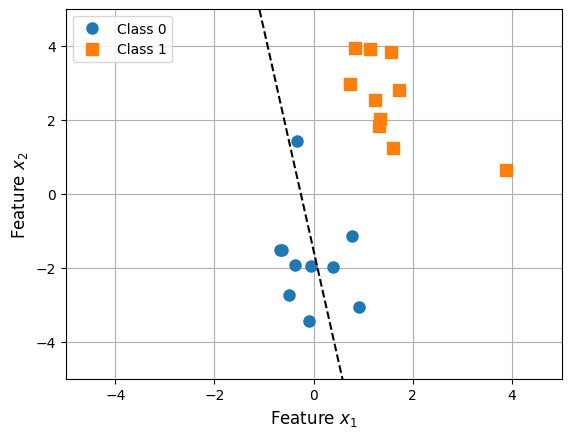

batch_idx: 20, loss: -1, bias: 0.0, weights: ['0.0311', '0.0179']


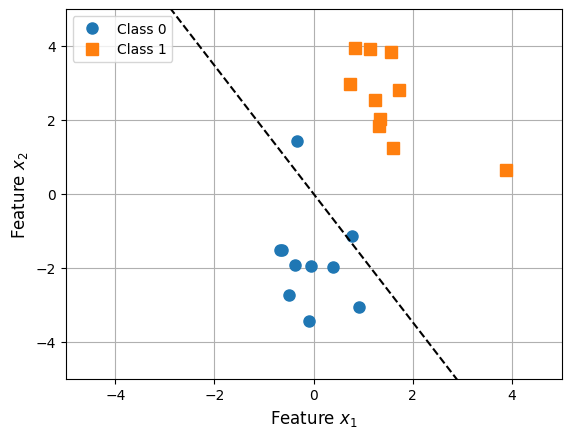

batch_idx: 21, loss: -1, bias: -0.01, weights: ['0.0344', '0.0035']


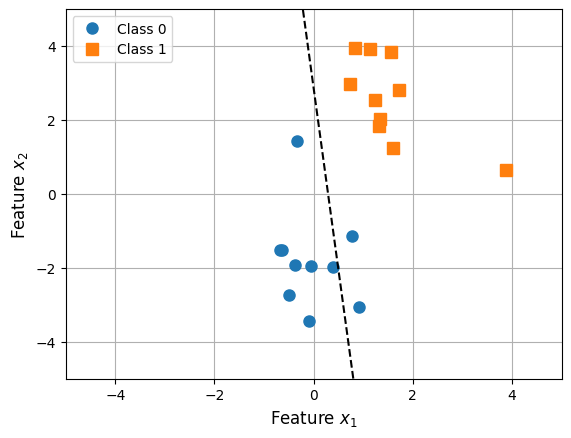

batch_idx: 22, loss: -1, bias: -0.02, weights: ['0.0253', '0.0342']


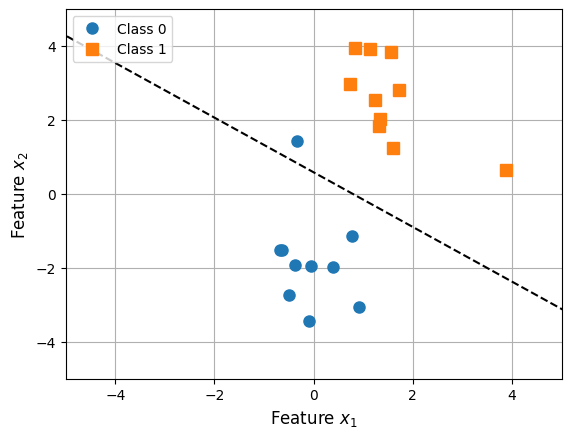

batch_idx: 41, loss: -1, bias: -0.03, weights: ['0.0286', '0.0198']


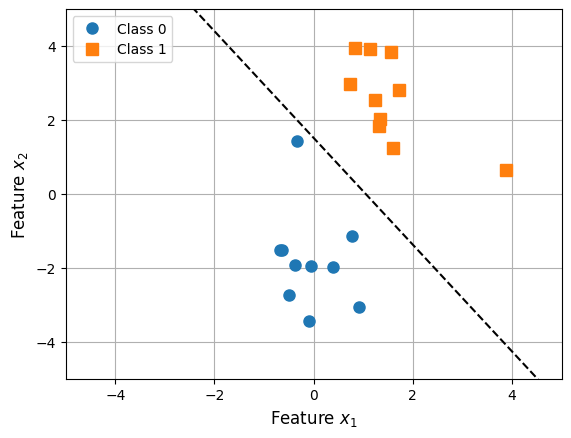

In [11]:
for batch_idx, metrices in enumerate(history):
    if metrices[0] != 0: # loss
        formatted_w = [f"{x:.4f}" for x in metrices[2]]
        print(f"batch_idx: {batch_idx}, loss: {metrices[0]}, bias: {metrices[1]}, weights: {formatted_w}")
        plot_feature2d(X_train, y_train, metrices[1], metrices[2], markersize=8)